In [57]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
org_df = pd.read_csv('charity_data.csv')
org_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [64]:
# Finding data type for all columns
org_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [73]:
# Generate our categorical variable list
org_cat = org_df.dtypes[org_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
org_df[org_cat].nunique()

NAME                      19568
APPLICATION_TYPE              9
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
dtype: int64

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [8]:
# Check the unique value counts to see if binning is required
org_df.EIN.value_counts()

471361061    1
716145914    1
470850777    1
742622426    1
436124893    1
            ..
205040320    1
461149136    1
474460867    1
204833477    1
352260098    1
Name: EIN, Length: 34299, dtype: int64

In [61]:
# Check the unique value counts to see if binning is required
appl_type = org_df.APPLICATION_TYPE.value_counts()
appl_type

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

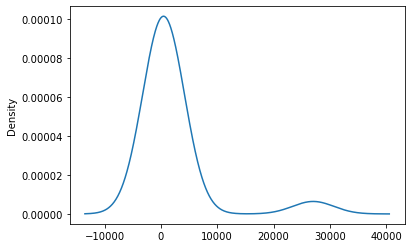

In [62]:
# Visualize the value counts - Most comon unique values 
appl_type.plot.density()

In [63]:
# Determine which values to replace
replace_appl_type = list(appl_type[appl_type < 500].index)

# Replace in DataFrame
for appl_type in replace_appl_type:
    org_df.APPLICATION_TYPE = org_df.APPLICATION_TYPE.replace(appl_type,"Other")


# Check to make sure binning was successful
org_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [70]:
# Creating a dictionary
application = {"T3": "3", "T4":"4", "T6":"6", "T5":"5", "T19":"19", "T8":"8", "T7":"7", "T10":"10", "Other":"1"}

In [71]:
# Replacing values with dictionary
org_df1 = org_df.replace({"APPLICATION_TYPE": application})
org_df1

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [75]:
# Changing data type for APPLICATION_TYPE column
org_df1["APPLICATION_TYPE"] = org_df1["APPLICATION_TYPE"].astype(int)

In [76]:
org_df1.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE           int32
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [77]:
# Check the unique value counts to see if binning is required
org_df.AFFILIATION.value_counts()

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

In [78]:
# New dictionary for AFFILIATION column
affiliation = {"Independent": "1", "CompanySponsored":"2", "Family/Parent":"3", "National":"3", "Regional":"3", "Other":"3"}

In [79]:
# Replacing values with dictionary
org_df2 = org_df1.replace({"AFFILIATION": affiliation})
org_df2

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,10,1,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,3,1,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,5,2,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,3,2,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,3,1,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,4,1,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,4,2,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,3,2,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,5,1,C3000,ProductDev,Association,1,0,N,5000,1


In [80]:
org_df2.AFFILIATION.value_counts()

1    18480
2    15705
3      114
Name: AFFILIATION, dtype: int64

In [95]:
# Changing data type for CLASSIFICATION column
org_df2["AFFILIATION"] = org_df2["AFFILIATION"].astype(int)

In [96]:
org_df2.CLASSIFICATION.value_counts().nlargest(35)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [97]:
# Check the unique value counts to see if binning is required
class_type = org_df2.CLASSIFICATION.value_counts()
class_type

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [98]:
# Determine which values to replace in CLASSIFICATION column
replace_class_type = list(class_type[class_type < 100].index)

# Replace in DataFrame
for class_type in replace_class_type:
    org_df2.CLASSIFICATION = org_df2.CLASSIFICATION.replace(class_type,"Other")


# Check to make sure binning was successful
org_df2.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [99]:
# New dictionary for CLASSIFICATION column
classification = {"C1000": "1000", "C2000": "2000", "C1200": "1200", "C3000": "3000", "C2100": "2100", "C7000": "7000", "Other": "9000", "C1700": "1700",
"C4000": "4000", "C5000": "5000", "C1270": "1270", "C2700": "2700"}

In [100]:
# Replacing values with dictionary
org_df3 = org_df2.replace({"CLASSIFICATION": classification})
org_df3

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,10,1,1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,3,1,2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,5,2,3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,3,2,2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,3,1,1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,4,1,1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,4,2,3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,3,2,2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,5,1,3000,ProductDev,Association,1,0,N,5000,1


In [101]:
# Changing data type for CLASSIFICATION column
org_df3["CLASSIFICATION"] = org_df3["CLASSIFICATION"].astype(int)

In [102]:
org_df3.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE           int32
AFFILIATION                int32
CLASSIFICATION             int32
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [104]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df3 = pd.DataFrame(enc.fit_transform(org_df3.CLASSIFICATION.values.reshape(-1,1)))

# Rename encoded columns
encode_df3.columns = enc.get_feature_names(['CLASS'])
encode_df3.head()

,CLASS_1000,CLASS_1200,CLASS_1270,CLASS_1700,CLASS_2000,CLASS_2100,CLASS_2700,CLASS_3000,CLASS_4000,CLASS_5000,CLASS_7000,CLASS_9000
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
# Merge the two DataFrames together and drop the Country column
org_df4 = org_df3.merge(encode_df3,left_index=True,right_index=True).drop("CLASSIFICATION",1)

In [106]:
org_df4

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,...,CLASS_1270,CLASS_1700,CLASS_2000,CLASS_2100,CLASS_2700,CLASS_3000,CLASS_4000,CLASS_5000,CLASS_7000,CLASS_9000
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,10,1,ProductDev,Association,1,0,N,5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,3,1,Preservation,Co-operative,1,1-9999,N,108590,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,5,2,ProductDev,Association,1,0,N,5000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,3,2,Preservation,Trust,1,10000-24999,N,6692,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,3,1,Heathcare,Trust,1,100000-499999,N,142590,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,4,1,ProductDev,Association,1,0,N,5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,4,2,ProductDev,Association,1,0,N,5000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
34296,996012607,PTA HAWAII CONGRESS,3,2,Preservation,Association,1,0,N,5000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,5,1,ProductDev,Association,1,0,N,5000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [103]:
org_df.USE_CASE.value_counts()

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

In [107]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df4 = pd.DataFrame(enc.fit_transform(org_df4.USE_CASE.values.reshape(-1,1)))

# Rename encoded columns
encode_df4.columns = enc.get_feature_names(['USE'])
encode_df4.head()

,USE_CommunityServ,USE_Heathcare,USE_Other,USE_Preservation,USE_ProductDev
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0


In [108]:
# Merge the two DataFrames together and drop the Country column
org_df5 = org_df4.merge(encode_df4,left_index=True,right_index=True).drop("USE_CASE",1)

In [114]:
org_df5

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,...,CLASS_3000,CLASS_4000,CLASS_5000,CLASS_7000,CLASS_9000,USE_CommunityServ,USE_Heathcare,USE_Other,USE_Preservation,USE_ProductDev
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,10,1,Association,1,0,N,5000,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,3,1,Co-operative,1,1-9999,N,108590,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,5,2,Association,1,0,N,5000,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,3,2,Trust,1,10000-24999,N,6692,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,3,1,Trust,1,100000-499999,N,142590,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,4,1,Association,1,0,N,5000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,4,2,Association,1,0,N,5000,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34296,996012607,PTA HAWAII CONGRESS,3,2,Association,1,0,N,5000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,5,1,Association,1,0,N,5000,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [115]:
org_df5.ORGANIZATION.value_counts()

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

In [118]:
# Fit the encoder and produce encoded DataFrame
encode_df5 = pd.DataFrame(enc.fit_transform(org_df5.ORGANIZATION.values.reshape(-1,1)))

# Rename encoded columns
encode_df5.columns = enc.get_feature_names(['ORG'])
encode_df5.head()

,ORG_Association,ORG_Co-operative,ORG_Corporation,ORG_Trust
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0


In [119]:
# Merge the two DataFrames together and drop the Country column
org_df6 = org_df5.merge(encode_df5,left_index=True,right_index=True).drop("ORGANIZATION",1)

In [140]:
org_df6

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,CLASS_1000,...,CLASS_9000,USE_CommunityServ,USE_Heathcare,USE_Other,USE_Preservation,USE_ProductDev,ORG_Association,ORG_Co-operative,ORG_Corporation,ORG_Trust
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,10,1,1,0,N,5000,1,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,3,1,1,1-9999,N,108590,1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,5,2,1,0,N,5000,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,3,2,1,10000-24999,N,6692,1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,3,1,1,100000-499999,N,142590,1,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,4,1,1,0,N,5000,0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,4,2,1,0,N,5000,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
34296,996012607,PTA HAWAII CONGRESS,3,2,1,0,N,5000,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,5,1,1,0,N,5000,1,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [159]:
# Check the unique value counts to see if binning is required
org_df6.INCOME_AMT.value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [160]:
# Fit the encoder and produce encoded DataFrame
encode_df6 = pd.DataFrame(enc.fit_transform(org_df6.INCOME_AMT.values.reshape(-1,1)))

# Rename encoded columns
encode_df6.columns = enc.get_feature_names(['INC_AMT'])
encode_df6

,INC_AMT_0,INC_AMT_1-9999,INC_AMT_10000-24999,INC_AMT_100000-499999,INC_AMT_10M-50M,INC_AMT_1M-5M,INC_AMT_25000-99999,INC_AMT_50M+,INC_AMT_5M-10M
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
34294,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34295,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34296,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34297,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [161]:
# Merge the two DataFrames together and drop the INCOME_AMT column
org_df7 = org_df6.merge(encode_df6,left_index=True,right_index=True).drop("INCOME_AMT",1)

In [162]:
org_df7

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,STATUS,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,CLASS_1000,CLASS_1200,...,ORG_Trust,INC_AMT_0,INC_AMT_1-9999,INC_AMT_10000-24999,INC_AMT_100000-499999,INC_AMT_10M-50M,INC_AMT_1M-5M,INC_AMT_25000-99999,INC_AMT_50M+,INC_AMT_5M-10M
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,10,1,1,N,5000,1,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,3,1,1,N,108590,1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,5,2,1,N,5000,0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,3,2,1,N,6692,1,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,3,1,1,N,142590,1,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,4,1,1,N,5000,0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,4,2,1,N,5000,0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34296,996012607,PTA HAWAII CONGRESS,3,2,1,N,5000,0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,5,1,1,N,5000,1,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Check the unique value counts to see if binning is required
org_df.SPECIAL_CONSIDERATIONS.value_counts()

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [163]:
# Fit the encoder and produce encoded DataFrame
encode_df7 = pd.DataFrame(enc.fit_transform(org_df7.SPECIAL_CONSIDERATIONS.values.reshape(-1,1)))

# Rename encoded columns
encode_df7.columns = enc.get_feature_names(['SPEC_CONS'])
encode_df7

,SPEC_CONS_N,SPEC_CONS_Y
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
34294,1.0,0.0
34295,1.0,0.0
34296,1.0,0.0
34297,1.0,0.0


In [164]:
# Merge the two DataFrames together and drop the INCOME_AMT column
org_df7 = org_df7.merge(encode_df7,left_index=True,right_index=True).drop("SPECIAL_CONSIDERATIONS",1)

In [165]:
org_df7

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,STATUS,ASK_AMT,IS_SUCCESSFUL,CLASS_1000,CLASS_1200,CLASS_1270,...,INC_AMT_1-9999,INC_AMT_10000-24999,INC_AMT_100000-499999,INC_AMT_10M-50M,INC_AMT_1M-5M,INC_AMT_25000-99999,INC_AMT_50M+,INC_AMT_5M-10M,SPEC_CONS_N,SPEC_CONS_Y
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,10,1,1,5000,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,3,1,1,108590,1,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,5,2,1,5000,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,3,2,1,6692,1,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,3,1,1,142590,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,4,1,1,5000,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,4,2,1,5000,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,996012607,PTA HAWAII CONGRESS,3,2,1,5000,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,5,1,1,5000,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [166]:
org_df7.ASK_AMT.value_counts()

5000       25398
10478          3
15583          3
6725           3
63981          3
           ...  
772556         1
70103          1
27096          1
25049          1
1138700        1
Name: ASK_AMT, Length: 8747, dtype: int64

In [194]:
# Establish the bins for ASK_AMT.
bins=[0,9999,24999,99999,999999,4999999,9999999,49999999,9999999999]
org_df7['ASK_AMT'].value_counts(bins=bins, sort=False)

(-0.001, 9999.0]              25946
(9999.0, 24999.0]              1135
(24999.0, 99999.0]             2685
(99999.0, 999999.0]            2956
(999999.0, 4999999.0]           940
(4999999.0, 9999999.0]          225
(9999999.0, 49999999.0]         258
(49999999.0, 9999999999.0]      154
Name: ASK_AMT, dtype: int64

In [197]:
# Establish the group names
group_names = ['<10K', '10K-24.9K', '25K-99.9K', '100K-999.9K', '1M-4.9M', '5M-9.9M', '10M-49.9M', '50M+']

In [198]:
# Categorize spending based on the bins and create a new column "ASK_AMT_Ranges"
org_df7["ASK_AMT_Ranges"] = pd.cut(org_df7['ASK_AMT'], bins, labels=group_names)
org_df7

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,STATUS,ASK_AMT,IS_SUCCESSFUL,CLASS_1000,CLASS_1200,CLASS_1270,...,INC_AMT_10000-24999,INC_AMT_100000-499999,INC_AMT_10M-50M,INC_AMT_1M-5M,INC_AMT_25000-99999,INC_AMT_50M+,INC_AMT_5M-10M,SPEC_CONS_N,SPEC_CONS_Y,ASK_AMT_Ranges
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,10,1,1,5000,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,<10K
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,3,1,1,108590,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,100K-999.9K
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,5,2,1,5000,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,<10K
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,3,2,1,6692,1,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,<10K
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,3,1,1,142590,1,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,100K-999.9K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,4,1,1,5000,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,<10K
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,4,2,1,5000,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,<10K
34296,996012607,PTA HAWAII CONGRESS,3,2,1,5000,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,<10K
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,5,1,1,5000,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,<10K


In [ ]:
df.groupby('column').filter(lambda group: group.size > X)

In [ ]:
org_df6.STATUS.value_counts()

In [ ]:
# Remove rows where Status is not active
org_df7 = org_df6[org_df6.STATUS != 0]
org_df7

In [ ]:
# Drop column with Status
org_df8 = org_df7.drop('STATUS', axis=1)
org_df8